<a href="https://colab.research.google.com/github/GurukulMore/CODSOFT/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Task 1:***💻

***Titanic Survival Prediction***🚢🚢

1.Importing the Dependencies

2.Data Collection and Preprocessing

3.Data Analysis

4.Data Visualization

5.Separating Features and Targets

6.Splitting Data

7.Training Model

8.Evaluating Accuracy Score

*Ignoring the Warnings

Let's First Import the Dependecies !!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Collecting Data and Processing It !!

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Let's check the total null values in the data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Null values

In [ ]:
#Since Cabin column has 687 values missing and it not having any impact on the target variable , so let's drop that column
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
#Let's replace the missing values in the age column with mean value of Age Column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
#Let's check whether the missing values are present in the age column or not ??
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#Let's now find which value is repeated most number of times in Embarked column and replace it with that value as there are only 2 values missing and they are in the form of text !!
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
#Let's check Again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now Let's do The Data Analysis

In [ ]:
#Statistical Data of the Data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization


In [ ]:
#Checking the number of Survived and non Survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Plotting the Survived and non Survived Passengers "Bar Plotting"
survived_counts = titanic_data['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
survived_counts['Survived'] = survived_counts['Survived'].map({0: 'No', 1: 'Yes'})
fig = px.bar(survived_counts, x='Survived', y='Count', text='Count', title='Survival Count')
fig.update_xaxes(title_text='Survived')
fig.update_yaxes(title_text='Count')
fig.show()

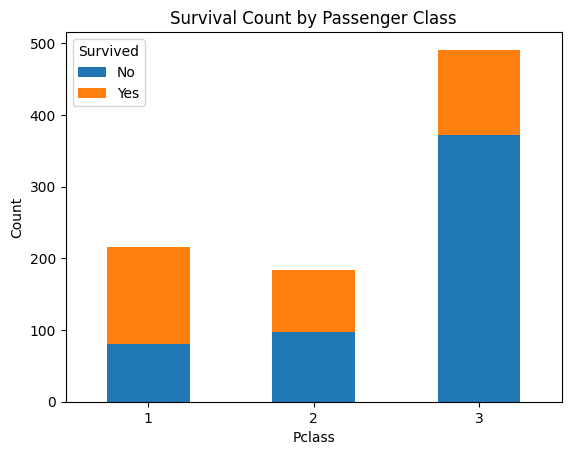

In [ ]:
#Now let's count the number of survived passenger along with their class
survived_pclass_counts = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()
survived_pclass_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

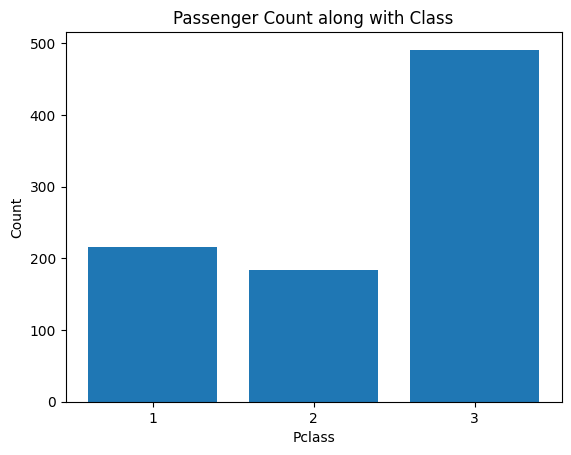

In [ ]:
#Now let's count the number of Passengers along with their Class
pclass_counts = titanic_data['Pclass'].value_counts()
plt.bar(pclass_counts.index, pclass_counts.values)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Count along with Class')
plt.xticks(pclass_counts.index, pclass_counts.index)
plt.show()

Encoding the Categorial columns values into numerical values for further use

In [ ]:
titanic_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [ ]:
#Replacing the values
titanic_data.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


Now Let's separate Features and Target

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    1  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    1  26.000000      0      0  30.0000         1
890       3    1  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Training the Model Using Logistic Regression Model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy Score on Training Data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 0.8117977528089888


In [ ]:
#Accuracy Score on Test Data
X_test_prediction = model.predict(X_test,)

In [ ]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


The Above program is used to demonstrate the basic workflow for analyzing 🔎 and evaluating 📝 The Titanic Dataset 🚢 , also highlighting the importance of data preprocessing 🚀 , data analysis 🖊 , model training 👨‍💻.